In [2]:
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="whitegrid")

In [3]:
with open('../data/annotated_swift_data.json') as json_data:
    input_json = json.load(json_data)
df = pd.DataFrame.from_dict(input_json)

In [4]:
df

,source,title,description,url,publishedAt,API,category,sentiment
0,"{'href': 'https://www.huffpost.com', 'title': ...",Taylor Swift's Fans Have Accused Her Of Being ...,Taylor Swift's Fans Have Accused Her Of Being ...,https://news.google.com/rss/articles/CBMiXmh0d...,2023-08-26T07:00:00Z,GNews,Controversy,Negative
1,"{'href': 'https://people.com', 'title': 'PEOPLE'}",Taylor Swift Has Heel Wardrobe Malfunction Dur...,Taylor Swift Has Heel Wardrobe Malfunction Dur...,https://news.google.com/rss/articles/CBMiT2h0d...,2023-11-21T05:48:59Z,GNews,Tour,Positive
2,{'href': 'https://www.foxnews.com/sports/patri...,Patrick Mahomes approves of Travis Kelce's rel...,Chiefs quarterback Patrick Mahomes gave his st...,https://www.foxnews.com/sports/patrick-mahomes...,2023-11-19T19:27:45Z,NewsAPI,Slice of Life,Positive
3,{'href': 'https://www.foxnews.com/entertainmen...,Taylor Swift returns to Rio stage after postpo...,Taylor Swift resumed The Eras Tour in Brazil a...,https://www.foxnews.com/entertainment/taylor-s...,2023-11-20T02:58:56Z,NewsAPI,Tour,Positive
4,"{'href': 'https://pagesix.com', 'title': 'Page...",Olivia Wilde shades Taylor Swift and Travis Ke...,Olivia Wilde shades Taylor Swift and Travis Ke...,https://news.google.com/rss/articles/CBMiZWh0d...,2023-10-06T07:00:00Z,GNews,Controversy,Negative
...,...,...,...,...,...,...,...,...
495,"{'href': 'https://www.cnn.com', 'title': 'CNN'}",Taylor Swift and Beyoncé are 'powerhouse' perf...,Taylor Swift and Beyoncé are 'powerhouse' perf...,https://news.google.com/rss/articles/CBMiUWh0d...,2023-10-04T07:00:00Z,GNews,Tour,Positive
496,"{'href': 'https://fox4kc.com', 'title': 'WDAF ...",‘Unfathomably special’: Taylor Swift sends mes...,‘Unfathomably special’: Taylor Swift sends mes...,https://news.google.com/rss/articles/CBMiamh0d...,2023-07-10T07:00:00Z,GNews,Tour,Positive
497,"{'href': 'https://people.com', 'title': 'PEOPLE'}",Dad Learned Lyrics to Taylor Swift's 'Cruel Su...,Dad Learned Lyrics to Taylor Swift's 'Cruel Su...,https://news.google.com/rss/articles/CBMiVGh0d...,2023-07-11T07:00:00Z,GNews,Fan,Positive
498,"{'href': 'https://www.inquirer.com', 'title': ...",Is Taylor Swift on the Eagles' Christmas album...,Is Taylor Swift on the Eagles' Christmas album...,https://news.google.com/rss/articles/CBMicWh0d...,2023-11-17T13:22:20Z,GNews,Music,Neutral


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

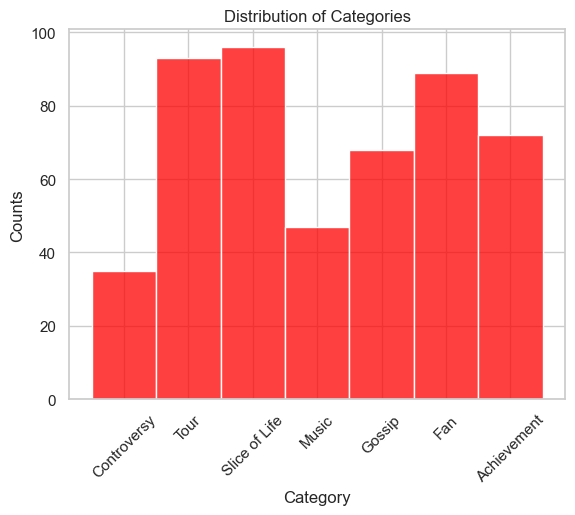

In [5]:
sns.histplot(data=df, x='category', color='red')  # Adjust the number of bins as needed
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
#plt.savefig('distribution_categories.png', bbox_inches='tight')

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

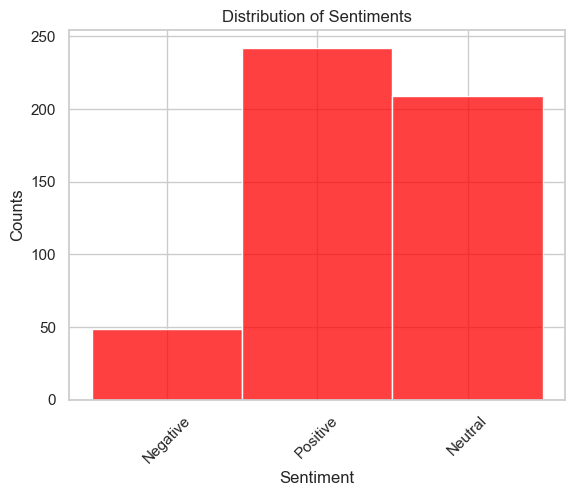

In [6]:
sns.histplot(data=df, x='sentiment', color='red')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Distribution of Sentiments')
plt.xticks(rotation=45)

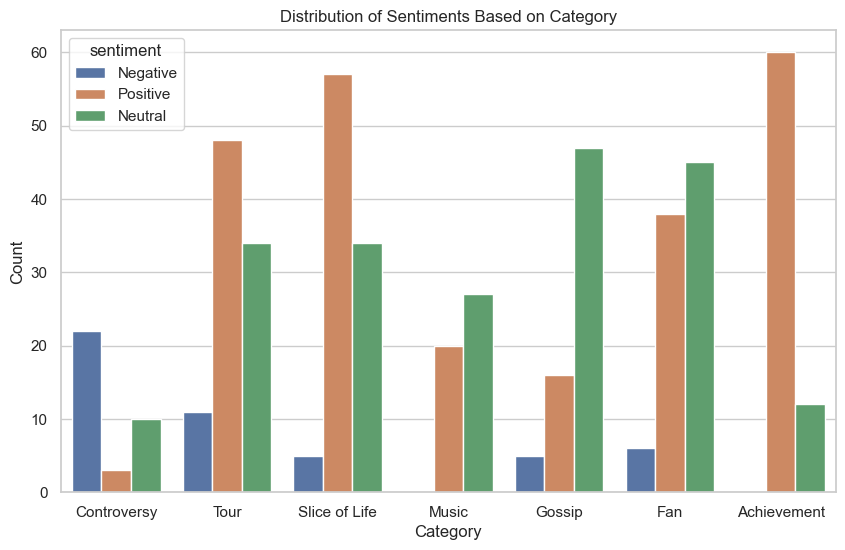

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='sentiment', data=df)
plt.title("Distribution of Sentiments Based on Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

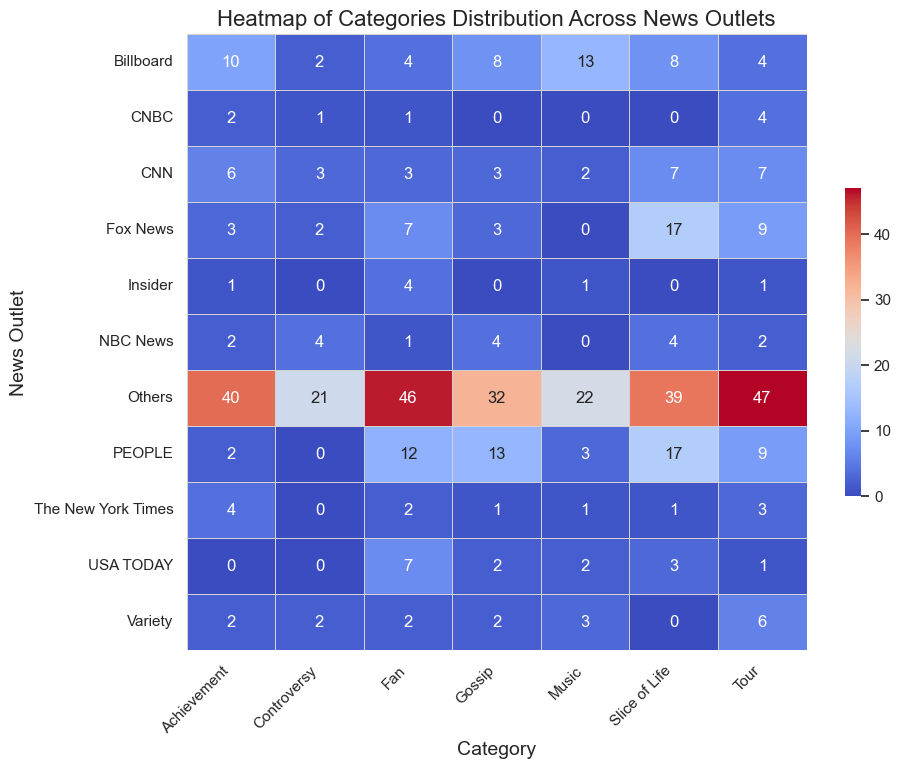

In [31]:
major_news_sources = [
    "Billboard", "CNBC", "CNN", "Fox News",
    "Insider", "NBC News", "PEOPLE", "The New York Times",
    "USA TODAY", "Variety"
]

def map_to_major_sources(title):
    if title in major_news_sources:
        return title
    else:
        return 'Others'

df['News Outlet'] = df['source'].apply(lambda x: map_to_major_sources(x['title']))

heatmap_data = pd.pivot_table(df, index='News Outlet', columns='category', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8)) 
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d", cbar_kws={'shrink': 0.5}, linewidths=.5, linecolor='lightgray')
plt.title("Heatmap of Categories Distribution Across News Outlets", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.xlabel("Category", fontsize=14)
plt.ylabel("News Outlet", fontsize=14)
plt.show()
